# Example 1:  testing the time spent on the website

The One Sample T Test describes the real life business application.

**Problem:** 

Is the time spent on the Website really 170 seconds?


**Detail:**

* There are average times spent on the website obtained from the software.

* When these data are examined, a manager or an employee has the opinion that these values are not like this and they want to test this situation.

**Hypothesis:** 

* M:  Average time spent on the website
* H0: M  = 170 second
* H1: M! = 170 second   

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
measurements = np.array([17, 160, 234, 149, 107, 197, 75, 201, 225, 211, 119,
                         157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146,
                        203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110,
                        216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

print(measurements[0:10])
print(stats.describe(measurements))

[ 17 160 234 149 107 197  75 201 225 211]
DescribeResult(nobs=49, minmax=(17, 251), mean=154.57142857142858, variance=2629.875, skewness=-0.33226075851537823, kurtosis=-0.10832302711020958)


### Normality Assumption

It is tested whether the distribution of the measurements data set in the problem is normal or not. 
Normality assumption is realized with graphics and some tests.

Graph methods: qqplot and histogram,
test method: shapiro-wilks test.

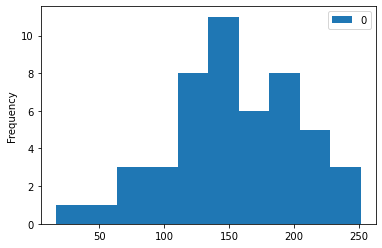

In [3]:
#histogram
pd.DataFrame(measurements).plot.hist();

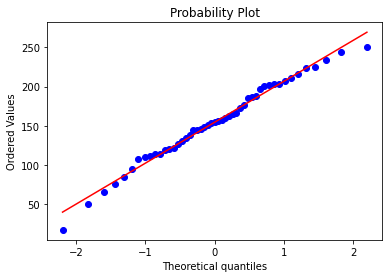

In [4]:
#qqplot
import pylab
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [5]:
# Shapiro-Wilks Test

#Hypothesis: 
#H0: There is no statistical difference between sample distribution and theoretical distribution.
#H1: There is a difference.
#p_value > 0.05(alpha error value) => H0 irrefutable.

from scipy.stats import shapiro
print(shapiro(measurements))
print("T calculation statistic(test statistics): " + str(shapiro(measurements) [0]))
print("Calculated p_value: " + str(shapiro(measurements) [1]))

ShapiroResult(statistic=0.9852723479270935, pvalue=0.79278963804245)
T calculation statistic(test statistics): 0.9852723479270935
Calculated p_value: 0.79278963804245


### One Sample T Test

Application of one sample T test with parametric hypothesis test.

It has been seen that the assumption of normality is provided in the graphic and test results above.
"If the distribution is normal, a One Sample T Test can be done."

In [6]:
# Hypothesis testing
# p_value < 0.05(alpha error value) => H0 denied.
# The average time spent on the website is not 170.

stats.ttest_1samp(measurements, popmean = 170)

Ttest_1sampResult(statistic=-2.10598950298473, pvalue=0.04046063209459197)

### Nonparametric One Sample T Test   (sign test)

In [7]:
# p_value > 0.05(alpha error value) => H0 irrefutable.
# Since the dataset in the problem is normal distribution (symmetric, parametric), the result of this test is not correct.
# The nonparametric test result would be correct if the normality assumption was not provided.

from statsmodels.stats.descriptivestats import sign_test
print(sign_test(measurements, 170))
print("test statistics: " + str(sign_test(measurements, 170) [0]))
print("p_value: "      + str(sign_test(measurements, 170) [1]))

(-6.5, 0.08543313315739448)
test statistics: -6.5
p_value: 0.08543313315739448


# Example 2:  conversion rate test


The One Sample Rate Test describes the real-life business application.

**Problem:**

An ad was given on a subject with a software and it was stated that a conversion rate of 0.125 was achieved by the software related to this ad. But this situation is wanted to be controlled. Because this is a high rate and does not match when the incomes are examined.


**Detail:**

* 500 people clicked on the ads, 40 of them came to our site and made shopping.

* Conversion ratio obtained through the sample: 40/500 = 0.08

**Hypothesis:** 

* p: conversion rate
* H0: p  =  0.125 
* H1: p !=  0.125

In [8]:
from statsmodels.stats.proportion import proportions_ztest

count = 40        #number of success
nobs  = 500       #number of observations
value = 0.125     #desired value to be tested

# p_value < 0.05(alpha error value) => H0 denied.
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

## Example 3:  success test of the ML model (AB test)

Two Independent Sample T Test is a real life business application.

**Problem:**

An investment has been made in an ML project. It is desired to compare the income generated as a result of the predictions it produces and the revenues generated by the old system and to test whether there is a significant difference.


**Detail:**

* The model has been developed and integrated into the website.

* Site users should be divided into two according to a certain rule.

* A group old, group b new system.

* A (legacy system): user group encountering products without product recommendation

* B (new system): the group of users encountering the products according to the predictions of the machine learning algorithm

* It is desired to test whether a meaningful work is done in terms of income.

**Hypothesis:** 

* M:  average income
* M1: average income of A
* M2: average income of B


* H0: M1 = M2  
* H1: M1 !=  M2

In [9]:
# DATA TYPE I

In [10]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                  25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                 32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
# DATA TYPE II

In [12]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                  25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                 32,33,33,33,31,32,33,26,32,33,29])

# Group of A and A
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

# Group of B and B
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

# All data
AB = pd.concat([A,B])
AB.columns = ["income", "GROUP"]
print(AB.head())
print(AB.tail())
AB.head()

   income GROUP
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    income GROUP
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


,income,GROUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


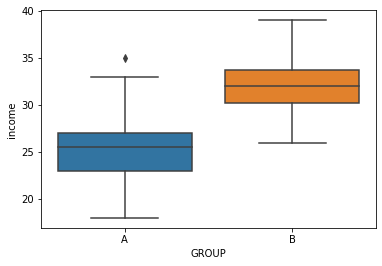

In [13]:
import seaborn as sns
sns.boxplot(x = "GROUP", y = "income", data = AB);

### Assumption Check

In [14]:
# Normality Assumption
# Hypothesis: 
# H0: There is no statistical difference between sample distribution and theoretical distribution.
# H1: There is a difference.
# p_value > 0.05(alpha error value) => H0 irrefutable.

from scipy.stats import shapiro
print(shapiro(A_B.A))       #Select A in dataset A_B
print(shapiro(A_B.B))       #Select B in dataset A_B

# Variance Homogeneity assumption
# Hypothesis: 
# H0: Variances are homogeneous. (The income averages of systems A and B are equal.)
# H1: Variances are not homogeneous.
# p_value > 0.05(alpha error value) => H0 irrefutable.

stats.levene(A_B.A, A_B.B)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)
ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)


LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

### Two Independent Sample T Test

Since the above two assumptions are satisfied, the "hypothesis of an independent two-sample t test" is tested.

In [15]:
# Hypothesis:
# M: average income
# H0: M1 = M2  
# H1: M1 !=  M2

# equal_var=True ==> "ensures variance homogeneity"
# p_value < 0.05(alpha error value) => H0 denied.

print(stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)) 

test_statistics, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))


# RESULT:
#p_value < 0.05(alpha error value) => H0 denied.
#There is a statistically significant difference between the old system and the new system. 
#This difference is in favor of the new system. 

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)
Test Statistics = -7.0287, p-value = 0.0000


### Nonparametric Two Independent Sample T Test  (mann-whitney test)

If the assumptions of normality and variance homogeneity were not provided, this nonparametric test would be performed.

In [16]:
print(stats.mannwhitneyu(A_B["A"], A_B["B"]))

test_statistics, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)
Test Statistics = 89.5000, p-value = 0.0000


# Example 4:  company training performance

Two Dependent Sample T Test is a real-life business application.

**Problem:**

It is wanted to measure whether a training program provided by the company to its employees provides added value or not.

**Detail:**

* A department is requesting training on a subject.

* Training is provided as a result of the necessary / unnecessary evaluation.

* Necessary measurements are made before and after the training.

* After the training program, the added value provided by the training is to be tested.

**Hypothesis:** 

* Mb: Performance average of the people before the training
* Ma: Performance average of the people after training
* H0: Mb = Ma
* H1: Mb !=  Ma

In [17]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                      121,118,124,121,125,115,115,119,118,121,117,117,120,120,
                      121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                     134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                     130,130,130,132,117,130,125,129,133,120,127,123])

In [18]:
# DATA TYPE I

SEPERATE = pd.concat([before,after], axis = 1)
SEPERATE.columns = ["BEFORE","AFTER"]
print("'SEPERATE' Data Set: \n\n", SEPERATE.head(), "\n\n")


# DATA TYPE II

#Group of before and B
GROUP_BEFORE = np.arange(len(before))
GROUP_BEFORE = pd.DataFrame(GROUP_BEFORE)
GROUP_BEFORE[:] = "BEFORE"
B = pd.concat([before, GROUP_BEFORE], axis = 1)

#Group of after and A
GROUP_AFTER = np.arange(len(after))
GROUP_AFTER  = pd.DataFrame(GROUP_AFTER)
GROUP_AFTER[:] = "AFTER"
A = pd.concat([after, GROUP_AFTER], axis = 1)

#All data
BA = pd.concat([B,A])
BA
BA.columns = ["PERFORMANCE","BEFORE_AFTER"]
print("'BA' Data Set: \n\n", BA.head(), "\n")

'SEPERATE' Data Set: 

    BEFORE  AFTER
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'BA' Data Set: 

    PERFORMANCE BEFORE_AFTER
0          123       BEFORE
1          119       BEFORE
2          119       BEFORE
3          116       BEFORE
4          123       BEFORE 



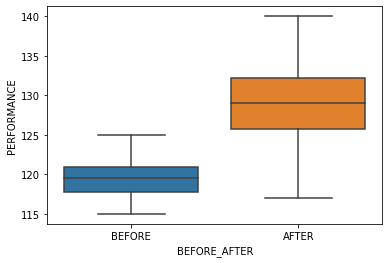

In [19]:
import seaborn as sns
sns.boxplot(x = "BEFORE_AFTER", y = "PERFORMANCE", data = BA);

# RESULT:
# In the graph, the median of AFTER (the one in orange) is higher.
# This means that after the company employees participated in the training, the performance of the employees improved.
# We will do some tests to be able to say this result statistically.

### Assumption Check

In [20]:
# Normality Assumption 
# Hypothesis: 
# H0: There is no statistical difference between sample distribution and theoretical distribution.
# H1: There is a difference.
# p_value > 0.05(alpha error value) => H0 irrefutable.

from scipy.stats import shapiro
print(shapiro(SEPERATE.BEFORE))       #Select BEFORE in dataset SEPERATE
print(shapiro(SEPERATE.AFTER))        #Select AFTER in dataset SEPERATE

# Variance Homogeneity Assumption
# Hypothesis: 
# H0: Variances are homogeneous. (The income averages of systems A and B are equal.)
# H1: Variances are not homogeneous.
# p_value < 0.05(alpha error value) => H0 denied.

stats.levene(SEPERATE.BEFORE, SEPERATE.AFTER)

# RESULT: 
# Normality assumption is provided.
# The variance homogeneity assumption was not provided, but was ignored.

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)
ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)


LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

### Two Dependent Sample T Test

Since the above two assumptions are satisfied, the "hypothesis of an dependent two-sample t test" is tested.

In [25]:
print(stats.ttest_rel(SEPERATE.BEFORE, SEPERATE.AFTER))

test_statistics, pvalue = stats.ttest_rel(SEPERATE["BEFORE"], SEPERATE["AFTER"])
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

# RESULT:
# p_value < 0.05(alpha error value) => H0 denied.
# There is a statistically significant difference between the old system and the new system. 
# This difference is in favor of the new system. 

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)
Test Statistics = -9.2815, p-value = 0.0000


### Nonparametric Two Dependent Sample T Test (wilcoxon test)

If the assumptions of normality and variance homogeneity were not provided, this nonparametric test would be performed.

In [23]:
print(stats.wilcoxon(SEPERATE.BEFORE, SEPERATE.AFTER))

test_statistics, pvalue = stats.wilcoxon(SEPERATE["BEFORE"], SEPERATE["AFTER"])
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

# RESULT:
# p_value < 0.05(alpha error value) => H0 denied.
# There is a statistically significant difference between the old system and the new system. 
# This difference is in favor of the new system. 

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)
Test Statistics = 15.0000, p-value = 0.0000


# Example 5:  user interface experiment (AB test)

The Two Sample Rate Test describes the real-life business application.

**Problem:**

This test is done to decide the button to be used on the website.

**Detail:**

* Green button: 1000 views, 300 clicks.
* Red button: 1100 views, 250 clicks.

**Hypothesis:** 

* p: conversion rate
* p1: green button conversion rate
* p2: red button conversion rate


* H0: p1  =  p2 
* H1: p1 !=  p2

In [24]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

two_count = np.array([300, 250])     #number of two success
two_nobs  = np.array([1000, 1100])   #number of two observations

# p_value < 0.05(alpha error value) => H0 denied.
proportions_ztest(count = two_count, nobs = two_nobs)

# RESULT:
# p_value < 0.05(alpha error value) => H0 denied.
# Buttons have different effects on user behavior.
# This difference is in favor of the green button.
# There is a statistically significant difference between the proportions of the two samples.

(3.7857863233209255, 0.0001532232957772221)